In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
titanic = pd.read_csv("C:/Users/P3Fusion/Downloads/titanic/train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
print(titanic['Age'].head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64


In [19]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
print(titanic['Embarked'].head(10))

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object


In [27]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
print(titanic['Sex'].head(10))

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: Sex, dtype: float64


In [29]:
print(titanic.info())
print(titanic.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          0 non-null      float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(3), int64(5), object(3)
memory usage: 76.7+ KB
None
       PassengerId    Survived      Pclass  Sex         Age       SibSp  \
count   891.000000  891.000000  891.000000  0.0  891.000000  891.000000   
mean    446.000000    0.383838    2.308642  NaN   29.361582    0.523008   
std     257.353842    0.486592    0.836071  NaN   13.019

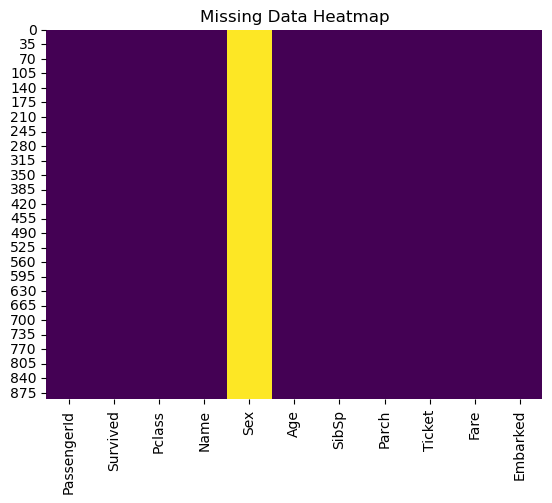

In [31]:
# Visualize missing data (if any are left)
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

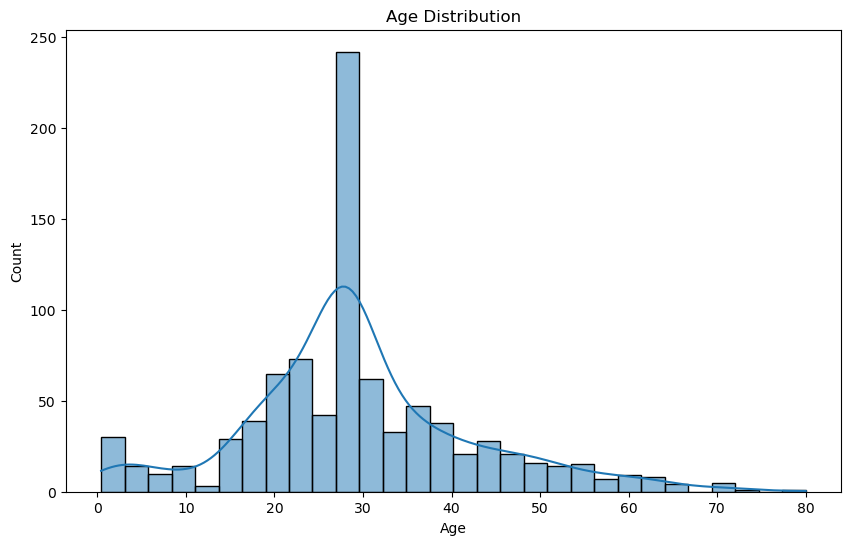

In [33]:
# Plot distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


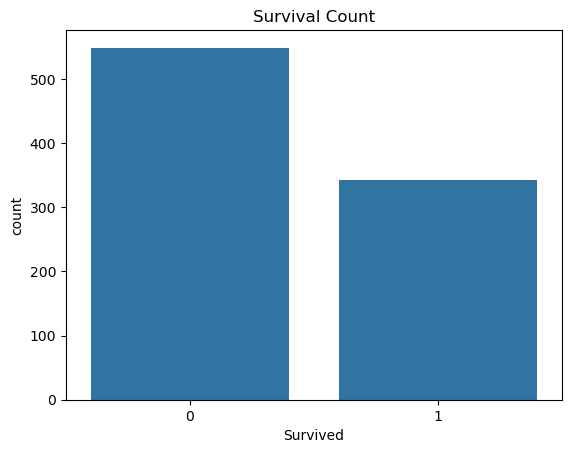

In [35]:
# Plot survival count
sns.countplot(data=titanic, x='Survived')
plt.title('Survival Count')
plt.show()

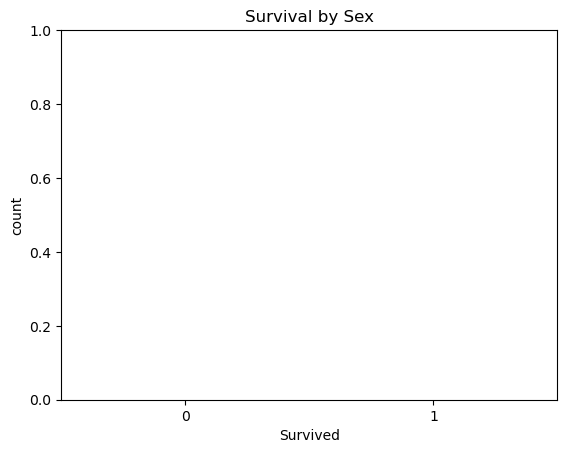

In [37]:
# Plot survival by sex
sns.countplot(data=titanic, x='Survived', hue='Sex')
plt.title('Survival by Sex')
plt.show()

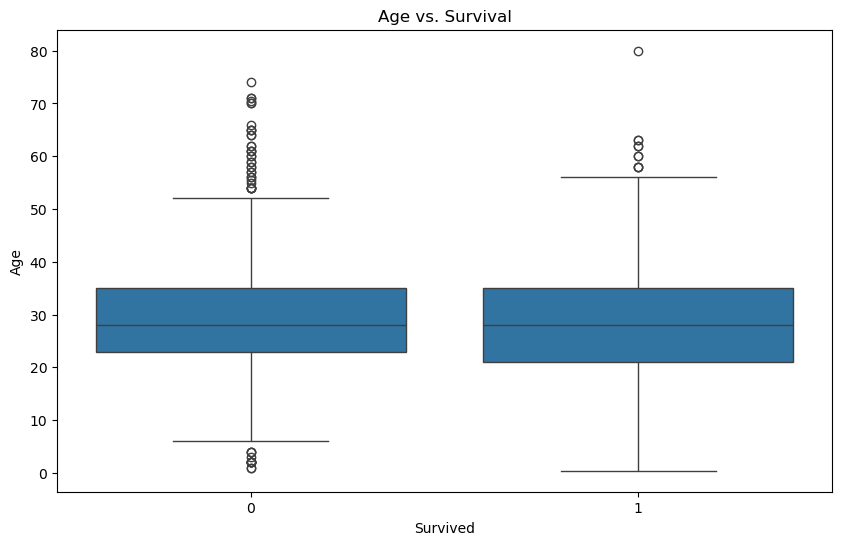

In [39]:
# Plot age vs. survival
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic, x='Survived', y='Age')
plt.title('Age vs. Survival')
plt.show()


ValueError: No objects to concatenate

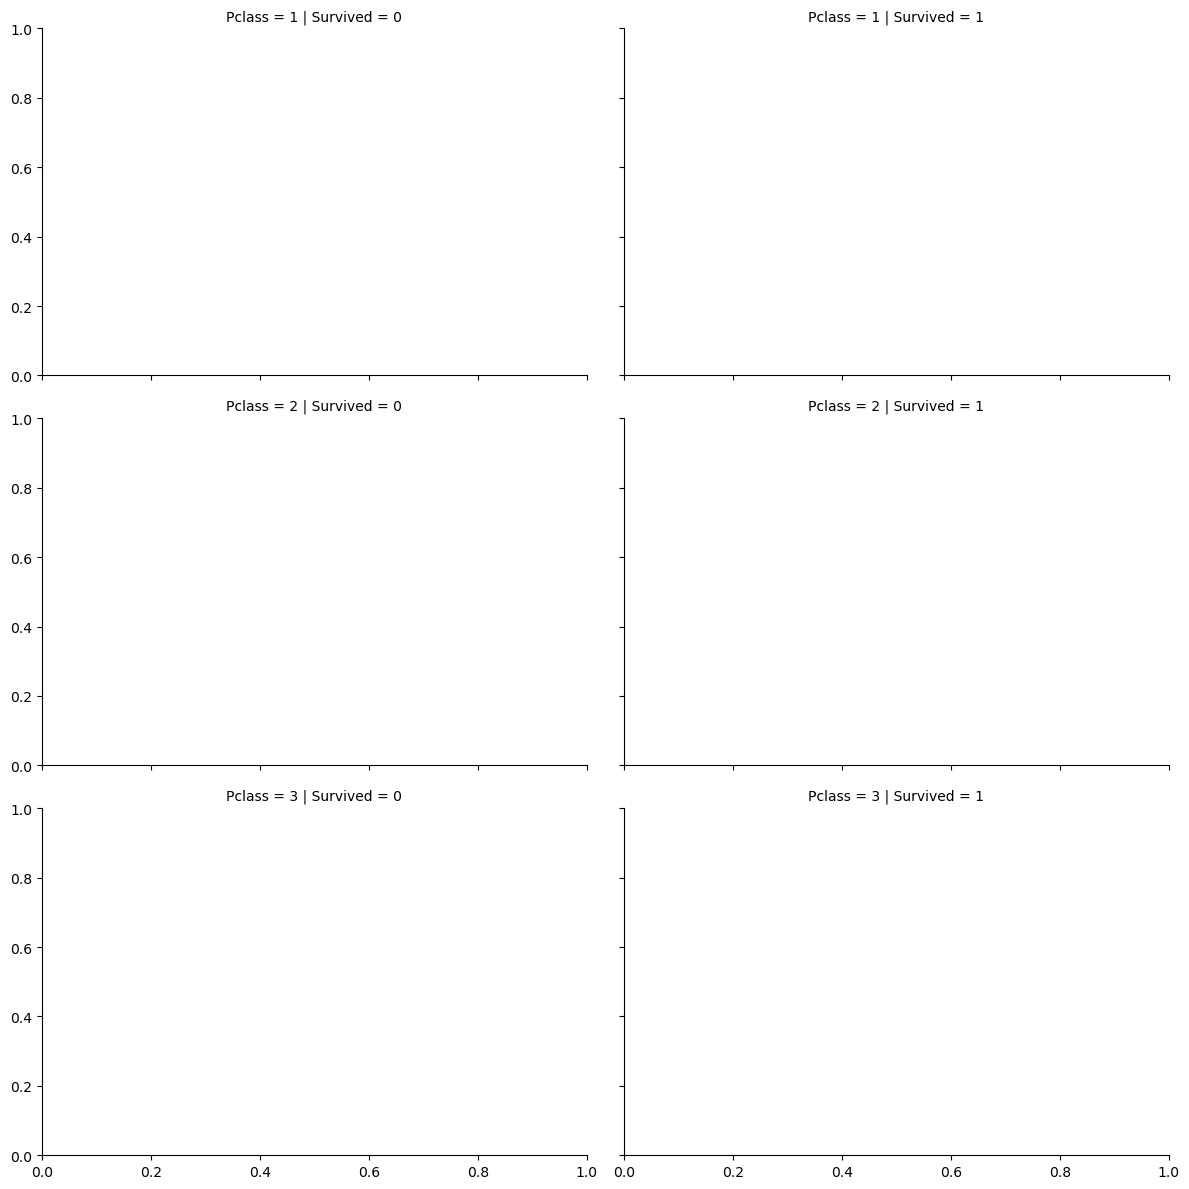

In [47]:
# Use FacetGrid to explore relationship between age, class, and survival
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', aspect=1.5, height=4)
grid.map_dataframe(sns.histplot, x='Age', hue='Sex', multiple='stack')
grid.add_legend()
plt.show()
